In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from scipy.stats import pointbiserialr,stats
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [37]:
df = pd.read_csv('/home/subhashreejune109828/assignment1/Churn_Modelling.csv')

In [38]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
target_col = 'Exited'

In [40]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [41]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [42]:
def drop_singl_val(df):
    for col in df.columns:
        if len(df[col].unique())<=1:
            df= df.drop(col,axis =1)
            print('dropped_column:',col)
    return df

In [43]:
df = drop_singl_val(df)

In [44]:
def analyze_missing_val(df):
    missing_stats = []
    for col in df.columns:
        missing_stats.append((col,df[col].nunique(),df[col].isnull().sum()*100/df.shape[0],df[col].value_counts(normalize = True,dropna=False).values[0]*100,df[col].dtype))
        stats_df = pd.DataFrame(missing_stats,columns =['feature','unique_values','percent_missing','percent_biggest_cat','type'])
        return stats_df.sort_values('percent_missing',ascending = False)
       
            

In [45]:
analyze_missing_val(df)

,feature,unique_values,percent_missing,percent_biggest_cat,type
0,RowNumber,10000,0.0,0.01,int64


In [46]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [47]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [55]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [61]:
df.duplicated().sum()

0

In [51]:
df[target_col].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [49]:
df[target_col].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

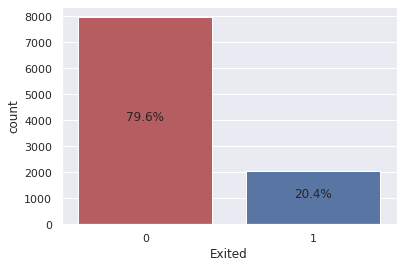

In [54]:
sns.set()
total = float(len(df))
ax = sns.countplot(x= target_col,data = df, palette=['r','b']);
for p in ax.patches:
    percentage ='{:.1f}%'.format(100 * p.get_height()/total)
    x=p.get_x() + p.get_width()/2
    y= p.get_height()/2
    ax.annotate(percentage, (x,y),ha ='center')
plt.show()

In [62]:
for col_name in df.columns:
    print(df[col_name].value_counts())

2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: RowNumber, Length: 10000, dtype: int64
15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Dominguez     1
Birk          1
Langlands     1
Larkin        1
Lopez         1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Lengt

In [63]:
cont_var = df.select_dtypes(exclude ='object').columns.difference([target_col])

In [64]:
nom_var = df.select_dtypes(include ='object').columns

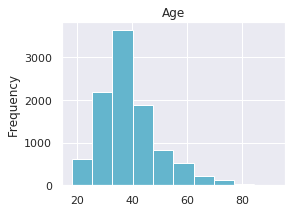

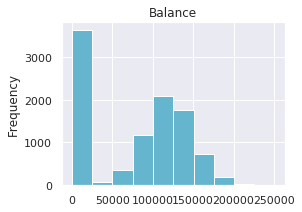

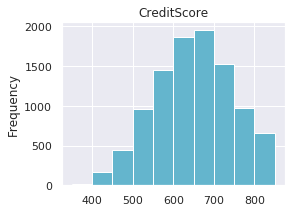

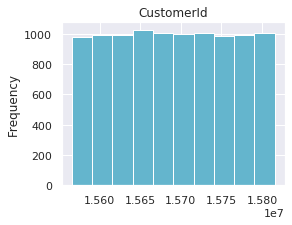

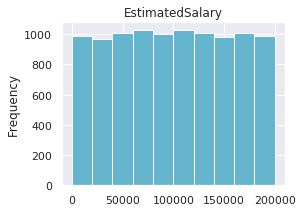

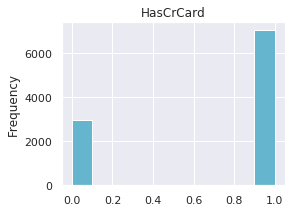

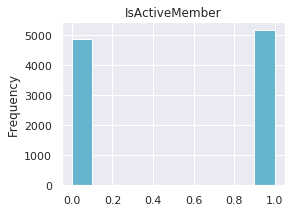

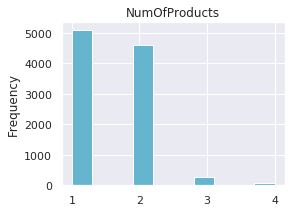

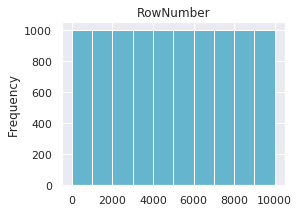

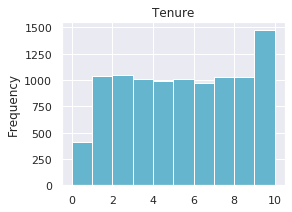

In [65]:
for i,name in enumerate(df[cont_var]):
    plt.figure(i,figsize=(4,3))
    df[name].plot(kind="hist",color="c",title=name)